In [1]:
%%capture
%run data_analysis.ipynb

In [6]:
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta

## Features Engineering

Idées 

* Nombre d'activités dernier 30 jours avant aujourd'hui
* Ecart de jour depuis la derniere activité
* Moyenne 30 derniers jours speed , heart_rate , watts , calories , suffer_score ? 
* Home Trainer ou pas 
* Heure de la journée de début ? =)
* Mois de l'année ( meilleure performance , hiver été etc... ) 

**Nombres d'activités dernier 30 jours avant aujourd'hui**

Erreur si on fait plusieurs activitées le meme jour... mais cas marginal

In [7]:
def activities_last_30d(segments, activities):
    nb_activities_last_30d = []
    for date in segments['start_date']:
        end_date = date - timedelta(days=1)
        start_date = end_date - timedelta(days=30)
        result = len(activities[activities['start_date'].between(start_date,end_date)])
        nb_activities_last_30d.append(result)
    segments['nb_activities_last_30d'] = nb_activities_last_30d
    return segments

In [8]:
segments = activities_last_30d(segments_df, activities_df)

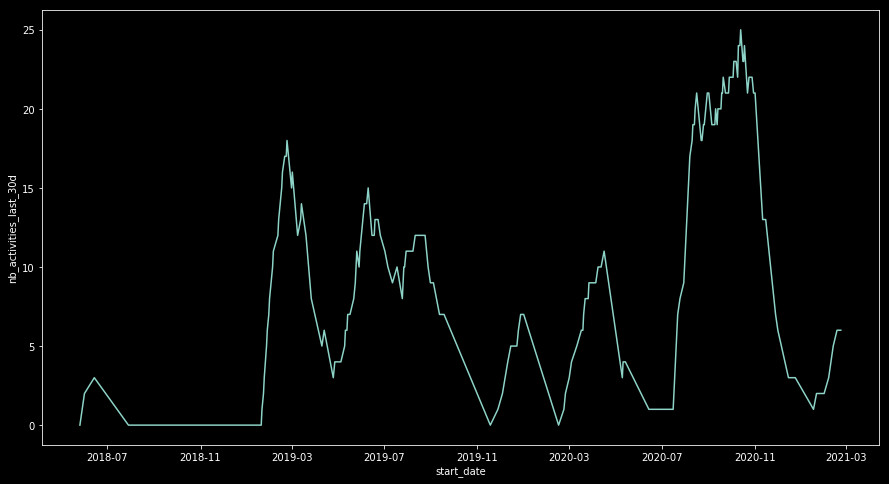

In [9]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.plot(segments_df['start_date'],segments_df['nb_activities_last_30d'])
plt.xlabel('start_date')
plt.ylabel('nb_activities_last_30d')
plt.show()